# Objective: Accurately predict insurance costs for Customers based on their inputs?

# DOMAIN ANALYSIS:

**Health Insurance:**

        Insurance is required primarily to provide financial protection and security against unforeseen events and risks that otherwise lead to significant financial hardship or ruin.
    
**Financial Security:**
        Protection against losses: Life is unpredictable, and things like accidents, illnesses, natural disasters, theft, or even death can strike at any time. Insurance compensates for losses incurred due to these covered risks, preventing individuals from facing severe financial hardships.
        
**Maintaining financial stability:** 
        Without insurance, a major unexpected event could wipe out savings, force the sale of assets, or lead to significant debt, jeopardizing financial stability. Insurance acts as a safety net, allowing people to recover financially.

**Risk Management and Sharing:**
        Insurance works on the principle of risk sharing. Policyholders pay premiums, and the insurance company pools these funds. When a loss occurs to one policyholder, the insurance company uses the collective fund to compensate them, effectively transferring the financial risk from the individual to the larger group.

**Predictability of cost:**
        While individual losses are unpredictable, insurance makes the cost of potential losses more predictable through regular, smaller premium payments.

**Peace of Mind:**

        Knowing you have insurance coverage provides a sense of security and reduces stress about potential future challenges. This peace of mind allows individuals and families to live with fewer worries and focus on their lives.

**Tax Benefits:**

        In many countries, insurance premiums (especially for life and health insurance) offer tax deductions, which can reduce your taxable income. Additionally, certain payouts from insurance policies may be tax-exempt.

    Insurance is not about preventing bad things from happening, but about mitigating their financial impact when they do. It's a fundamental component of a sound financial strategy for individuals, families.

    The premium or the charges that have to be incurred by an individual depends on many factors and these factors decide how much amount, an individual has to pay.

    Below are the factors that are mentioned in the dataset that decide the charge per customer:

        
**Dataset Features / Columns:**
    
    •	Age: age of primary beneficiary 
    •	Sex: insurance contractor gender, female, male 
    •	BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
                objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
    •	Children: Number of children covered by health insurance / Number of dependents
    •	Smoker: Smoking
    •	Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    •	Charges: Individual medical costs billed by health insurance
    

**Body Mass Index (BMI):**
    
    It is a simple numerical measure used to classify a person's weight relative to their height. It's a widely used screening tool to categorize            individuals into weight status categories like underweight, healthy weight, overweight, and obesity.

    What it's Used For:

    Screening Tool: It helps identify potential weight problems for adults.

    Population Health: It's useful for tracking obesity trends across populations.

    Risk Assessment: While not a diagnostic tool, it can indicate an increased risk for certain health problems associated with weight, such as heart        disease, diabetes, and some cancers.

    * Underweight: Below 18.5

    * Normal (Healthy) weight: 18.5 – 24.9

    * Overweight: 25.0 – 29.9

# Problem Statement:

        1) Prepare a complete data analysis report on the given data.
        2) Prepare the data, identifying key features, build and train a machine learning model using different alogorithms.
        3) Create a machine learning model to predict the insurance price charged to the customer.

In [1]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data from file(csv):

In [2]:
#Load data into a dataframe:
data = pd.read_csv(r"datasets_13720_18513_insurance(1).csv")

# Bassic Checks:

In [3]:
# Display of first five rows:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display of last five rows:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Check the total no of Rows and Columns:
data.shape

(1338, 7)

In [6]:
# Display column Headings:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# Convert all column headings to title case except bmi column to Upper case (BMI):
data.columns = [col.upper() if col.lower() == 'bmi' else col.title() for col in data.columns]
data.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [7]:
# Check datatypes, Categorical and Numerical Columns:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* All the columns with Object datatype are Categorical Columns.
* All the columns with Int64 and float64 datatype are Numerical Columns. (Later we will seggregate Int64 and float64)

In [8]:
# Assign a variable to all categorical columns:
cat_cols = data.select_dtypes(include='object')
cat_cols.columns.tolist()

['Sex', 'Smoker', 'Region']

In [9]:
# Assign a variable to all Numerical columns:
num_cols=data.select_dtypes(include=['int64','float64'])
num_cols.columns.tolist()

['Age', 'BMI', 'Children', 'Charges']

In [11]:
# Check for any missing values or Null values:
data.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

In [12]:
# Statistical Summary of Numericla Columns:
data.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Statistical Summary of Categorical Columns:
data.describe(include='O')

,Sex,Smoker,Region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Exploratory Data Analysis:

# UNIVARIATE ANALYSIS:

**(1) Age column Analysis:**

In [10]:
# Display of Unique Values of Age in sorted order:
np.sort(data.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

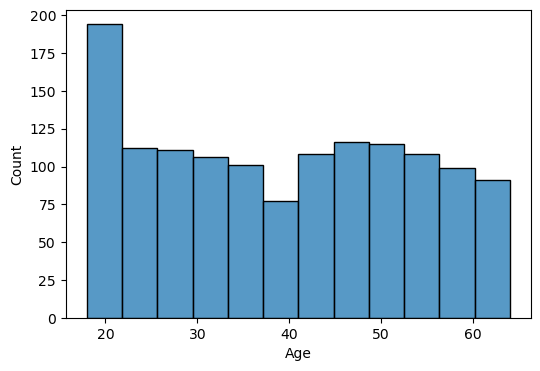

In [15]:
# Plotting Age Column:
plt.figure(figsize= (6,4))
sns.histplot(data=data, x='Age')
plt.xlabel('Age', fontsize=10)
plt.show()

In [16]:
# Using aggregate():
data['Age'].agg(['max', 'min', 'mean'])

max     64.000000
min     18.000000
mean    39.207025
Name: Age, dtype: float64

**Insights:**
    
    * Lowest Age is 18 and highest age is 64.
    * Average age is 39.
    * The age 18-20 range has a significantly higher count compared to all other age groups.
    * There's a noticeable dip in the number of people aged between 36 and 39.
    * Ages 25–60 are quite evenly represented, with slight fluctuations but no extreme peaks or troughs (except that 36–39 dip).
    * Fewer entries for individuals over age 60.

**(2)Sex Column Analysis:**

In [17]:
data.Sex.unique()

array(['female', 'male'], dtype=object)

In [18]:
data.Sex.value_counts()

Sex
male      676
female    662
Name: count, dtype: int64

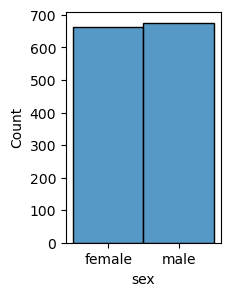

In [19]:
# Plotting Sex column:
plt.figure(figsize=(2,3))
sns.histplot(data=data, x='Sex')
plt.xlabel('sex',fontsize=10)
plt.show()

Insights:

    * There are two classes in sex column, Male and Female.
    * There are almost equal no. of records for both classes (Male=676, Female=662).

**(3) BMI column Analysis:**

In [12]:
data.BMI.value_counts()

BMI
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64

In [21]:
# Using aggregate():
data['BMI'].agg(['max', 'min', 'mean'])

max     53.130000
min     15.960000
mean    30.663397
Name: BMI, dtype: float64

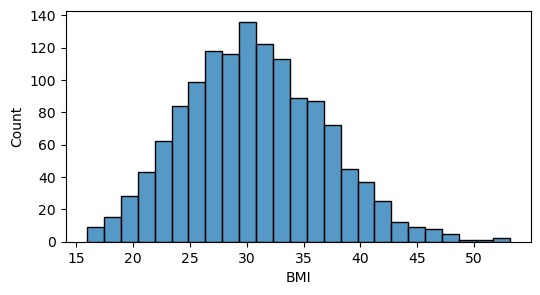

In [22]:
# Plotting BMI column:
plt.figure(figsize=(6,3))
sns.histplot(x='BMI', data=data)
plt.xlabel('BMI', fontsize=10)
plt.show()

Insights:

   * Most BMIs cluster around 25–35, with the peak at 30.
   * This suggests a population tending toward overweight/obese.
   * Right Skew Suggests or tail toward higher BMI values implies a portion of the population may have significantly elevated health risks.          (e.g., diabetes, cardiovascular issues).
   * This is relevant for insurance charge predictions and smoking-related health correlations.

**(4) Children column Analysis:**

In [23]:
 data.Children.unique()

array([0, 1, 3, 2, 5, 4])

In [24]:
data.Children.value_counts()

Children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

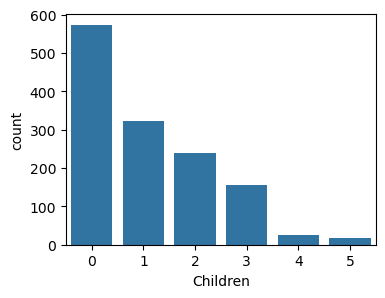

In [25]:
#Plotting Children column:
plt.figure(figsize=(4,3))
sns.countplot(data=data, x='Children')
plt.xlabel('Children', fontsize=10)
plt.show()

In [26]:
# Using aggregate():
data['Children'].agg(['max','min'])

max    5
min    0
Name: Children, dtype: int64

Insights:

    * 574 Person's are without children which suggests that a significant portion of the insured population are either single, child-free couples, or          younger adults.
    * 43 persons are having the highest no of children between 4-5.
    * Over 80% of individuals fall within the 0–2 children range.
    * The lesser no of children shows a pattern of real-world family planning trends, where larger families are less common. And this inturn helps             insurance companies to design schemes with less no of children.

**(5) Smoker column Analysis:**

In [27]:
data.Smoker.unique()

array(['yes', 'no'], dtype=object)

In [28]:
data.Smoker.value_counts()

Smoker
no     1064
yes     274
Name: count, dtype: int64

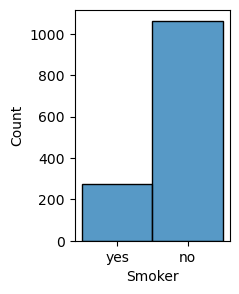

In [29]:
# Plotting Smoker column:
plt.figure(figsize=(2,3))
sns.histplot(data=data,x='Smoker')
plt.xlabel('Smoker', fontsize=10)
plt.show()

Insights:

    * Smoker = 2 classes (Yes, No)
    * There are 1064 non-smokers and 274 smokers. Roughly 20% of them are smokers.
    * This is an important imbalance and might impact model training and help in predicting outcomes like charges.
    * Smokers typically incur higher insurance charges due to increased likelihood of chronic conditions.



**(6) Region column Analysis:**

In [30]:
data.Region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [31]:
data.Region.value_counts()

Region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

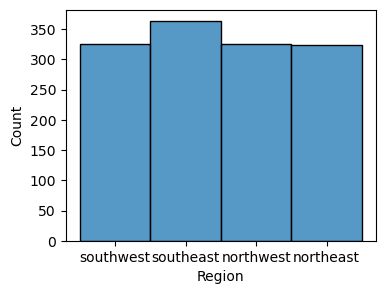

In [32]:
#Plotting Region column:
plt.figure(figsize=(4,3))
sns.histplot(data=data, x='Region')
plt.xlabel('Region', fontsize=10)
plt.show()

Insights:

    * Basically, there are four regions (Southeast,Southwest,Northeast,Northwest).
    * Data shows a balanced data for all the four regions.
    * Southeast region is leading with 364 count.
    

**(7) Charges column Analysis:**

In [33]:
data.Charges.value_counts()

Charges
1639.56310     2
27808.72510    1
1826.84300     1
11090.71780    1
39611.75770    1
              ..
46718.16325    1
3208.78700     1
37829.72420    1
21259.37795    1
2721.32080     1
Name: count, Length: 1337, dtype: int64

In [34]:
data['Charges'].agg(['max','min','mean','median'])

max       63770.428010
min        1121.873900
mean      13270.422265
median     9382.033000
Name: Charges, dtype: float64

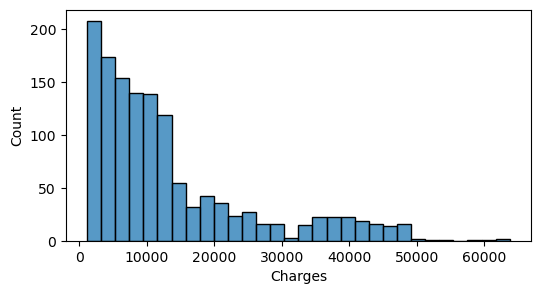

In [36]:
# Plotting Charges column:
plt.figure(figsize=(6,3))
sns.histplot(data=data, x='Charges')
plt.xlabel('Charges', fontsize=10)
plt.show()

Insights:

    * Right-Skewed Distribution
    * Most people are clustered in the lower range of charges.
    * A few individuals have very high charges, creating a long tail on the right (positive skew).
    * Some individuals have charges exceeding 50,000, with the maximum being 63,770.
    * The median charge of 9,386 and the mean of 13,279 highlights the influence of a few very costly cases or Outliers.

# BIVARIATE ANALYSIS:

**(1) Smoker Vs Charges:**

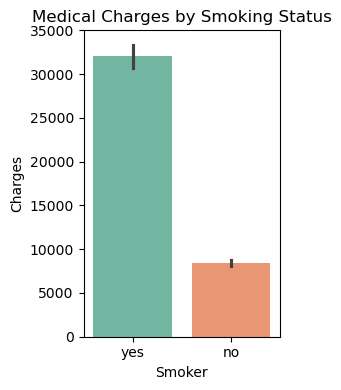

In [35]:
# Create the barplot:
plt.figure(figsize=(3, 4))
sns.barplot(x='Smoker', y='Charges', data=data, palette='Set2')

# Add titles and labels
plt.title('Medical Charges by Smoking Status', fontsize=12)
plt.xlabel('Smoker', fontsize=10)
plt.ylabel('Charges', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

**Insights:**

    * Smokers incur much higher medical charges.
    * Strong correlation between smoking and health expenses.
    * Lower costs for non-smokers.
    * The average medical cost for smokers is around 32,000, while for non-smokers it's around 8,000.
    * The average medical charges for smokers are 4 times higher than those for non-smokers.

**(2) BMI Vs Charges:**

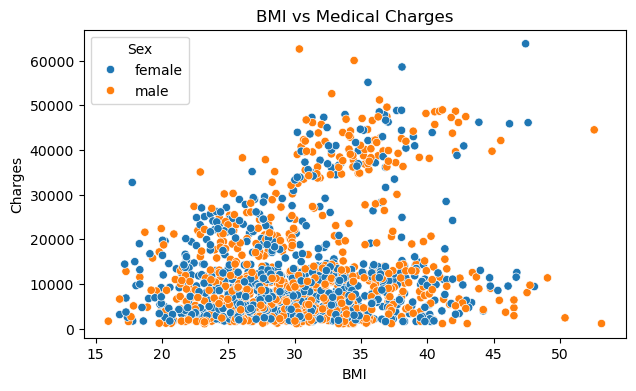

In [36]:
# Scatter Plot:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='BMI', y='Charges', data=data, hue='Sex')
plt.title('BMI vs Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

**Insights:**

    * There's no strong linear relationship between BMI and charges overall.
    * A cluster of higher charges appears around BMI 30–40, suggesting that individuals in this BMI range might be incurring more significant medical costs.
    * While many individuals with high BMI (35–45) still have low to moderate charges, there are outliers with very high charges in this range.
    * A large concentration of data points lies below 15,000, regardless of BMI.
    * Both males and females are fairly evenly distributed across BMI and charges.

**(3) Age Vs Charges:**

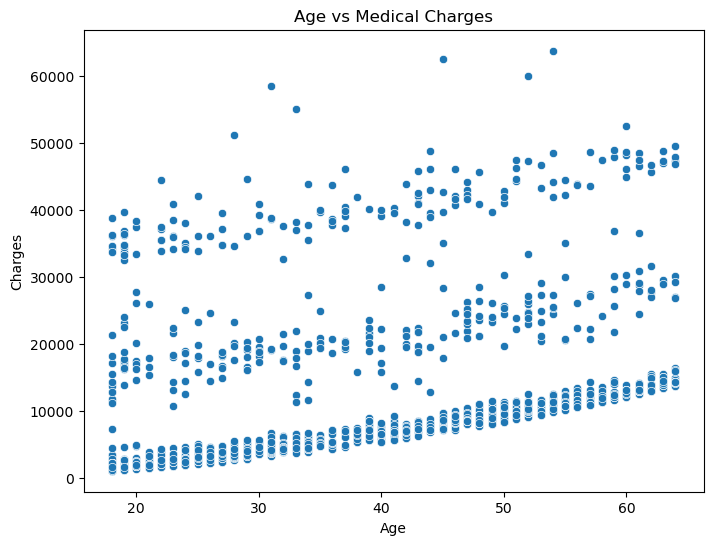

In [37]:
# Create scatter plot:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Charges', data=data)
plt.title('Age vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

**Insights:**

    * There’s a clear upward trend in the lower band of the data, as age increases, minimum charges also increase.
    * Older individuals (ages 50–65) generally face higher medical expenses, likely due to age-related health issues.
    * data appears to be grouped into three horizontal clusters:
        -Lower Band (0–10,000): Healthy individuals or those with minimal treatments.
        -Middle Band (10,000–30,000): Moderate healthcare users.
        -Upper Band (30,000–65,000): Possibly individuals with chronic conditions or major procedures.
    * A few younger people (under 30) have very high charges (50,000). These are likely outliers, perhaps due to accidents, chronic illness, or smoking.
    * Suggests age isn’t the only factor — others like lifestyle or BMI likely play a role.
        

# (4) Region Vs Charges:

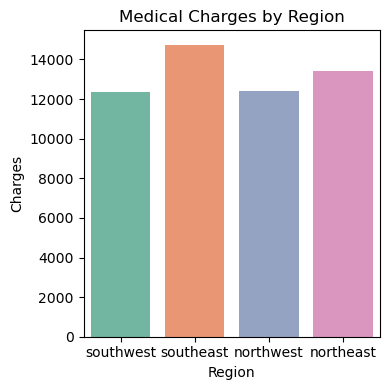

In [38]:
# Bar plot:
plt.figure(figsize=(4, 4))
sns.barplot(x='Region', y='Charges', data=data, palette='Set2', ci=None)

plt.title('Medical Charges by Region', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Charges', fontsize=10)

plt.tight_layout()
plt.show()

**Insights:**

    * SouthEast: Highest costs — may indicate greater incidence of chronic conditions, higher BMI/smoker ratio, or costlier care facilities.
        - A higher rate of smokers or obesity
        - More chronic illness or healthcare usage.
        - Or less access to preventative care in that region.
    * SouthWest & NorthWest: egions have the lowest average charges.
        - A healthier population overall.
        - Fewer high-risk individuals.
        - Or better lifestyle and access to affordable care.
    * NorthEast: Region has moderate charges, higher than southwest/northwest but below southeast.
        - Could reflect a balanced mix of risk and healthcare behavior.
    * Regional Data helps in Insurance pricing models, Resource allocation by region and Targeted health interventions for a specific group of people.
   

# (5) Sex Vs Charges:

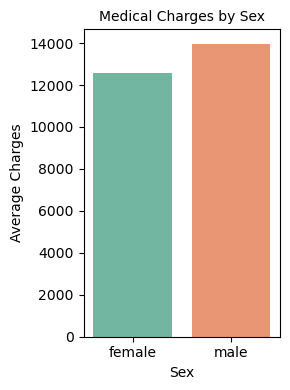

In [39]:
# Bar Plot:
plt.figure(figsize=(3, 4))
sns.barplot(x='Sex', y='Charges', data=data, palette='Set2', ci=None)

plt.title('Medical Charges by Sex', fontsize=10)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Average Charges', fontsize=10)

plt.tight_layout()
plt.show()

**Insights:**

    * Males Have Higher Average Medical Charges.
        - Average charges for Males 14,000 and Females 12,500.
    * Possible Reasons for the Difference:
        - Greater prevalence of risky behaviors (e.g., smoking, alcohol, sedentary lifestyle)
        - Higher BMI or comorbid conditions.
        - More chronic disease management or surgical interventions.
        - Different utilization of health services.
    * Difference can also help in:
        - Insurance premium models.
        - Gender-based healthcare planning.
        - Public health policy focus.


# (6) Sex Vs Smoker:

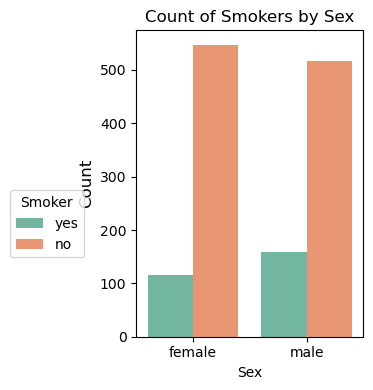

In [40]:
# Count plot:
plt.figure(figsize=(4, 4))
sns.countplot(x='Sex', hue='Smoker', data=data, palette='Set2')

# Add titles and labels
plt.title('Count of Smokers by Sex', fontsize=12)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Smoker', loc='best', bbox_to_anchor=(-0.2, 0.5))
# Show the plot
plt.tight_layout()
plt.show()

**Insights:**

    * The count of male smokers (green bar) is higher than female smokers, indicating that smoking is more prevalent among males.
    * For both sexes, the "no" (non-smoker) bar is significantly taller, showing that most individuals in both groups do not smoke.
    * Although both males and females have a majority of non-smokers, the gap between smokers and non-smokers is larger in females—meaning fewer females smoke compared to males.
    * This pattern may guide gender-specific health campaigns.

# (7) Region Vs Smoker:

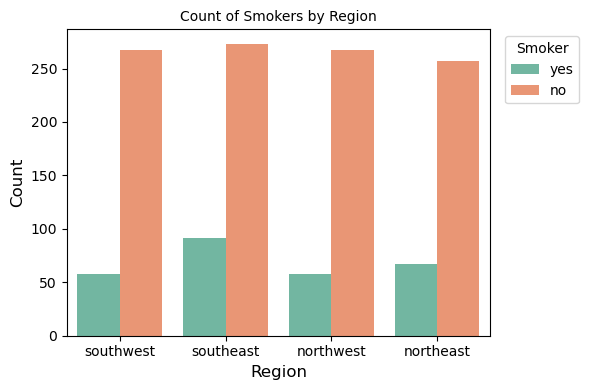

In [41]:
# Count plot:
plt.figure(figsize=(6, 4))

sns.countplot(x='Region', hue='Smoker', data=data, palette='Set2')

plt.title('Count of Smokers by Region', fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.legend(title='Smoker', loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

**Insights:**

    * Non-Smokers Dominate Across All Regions and count is fairly uniform across all regions.
    * Southeast has the most Smokers.
    * This could be an important region to target for anti-smoking campaigns or health interventions.
    * Northwest and Southwest have fewer Smokers.

# DATA PREPROCESSING:

In [42]:
# Check for any duplicate Rows:
data.duplicated().sum()  

np.int64(1)

* We have one duplicate row.
* Trace out the original and duplicate row:

In [43]:
# Display duplicate rows:
duplicate_rows = data[(data.duplicated(keep=False))]
duplicate_rows

,Age,Sex,BMI,Children,Smoker,Region,Charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [44]:
# Duplicate Row is being dropped here:
data.drop_duplicates(inplace=True)

In [45]:
# Cross check to see duplicate Row still exists:
data.duplicated().sum()

np.int64(0)

In [46]:
#  We cannot have Zero's in these columns,Check for any Zero's:
(data[['Charges','Age','BMI']] == 0).sum()

Charges    0
Age        0
BMI        0
dtype: int64

In [47]:
# We cannot have Negative values in these columns, so check for Negative values:

for col in ['Age', 'BMI', 'Charges']:
    if (data[col] < 0).any():
        print(f'{col}: Negative values found.')
        print(data[data[col] < 0])
    else:
        print(f'{col}: No negative values found.')

Age: No negative values found.
BMI: No negative values found.
Charges: No negative values found.


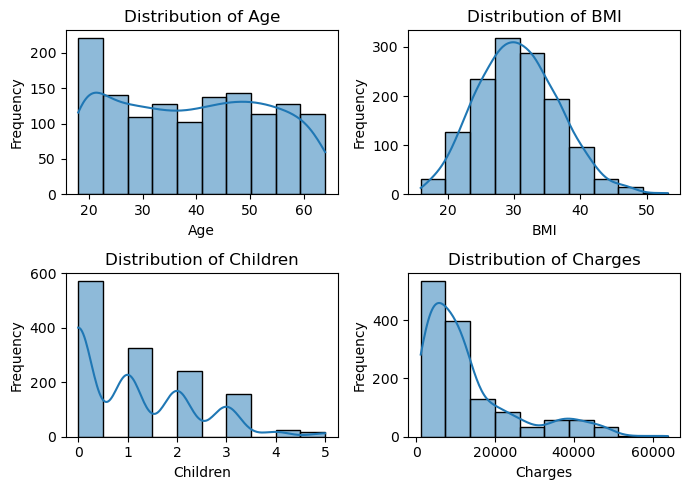

In [48]:
# Distribution plots for Numerical Columns:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
axes = axes.flatten()  # Flatten to 1D array for easy looping

for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


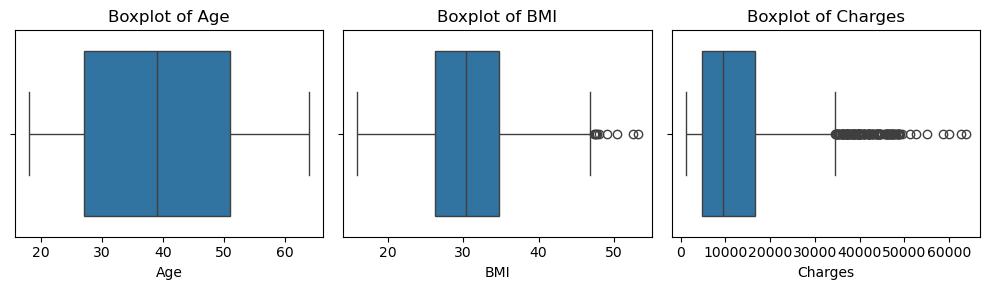

In [49]:
# Check for Outliers using Boxplots
num_cols2= data[['Age','BMI', 'Charges']]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
axes = axes.flatten()  # To easily loop over axes
for i, col in enumerate(num_cols2):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Outliers Retained: (BMI and Charges columns are having Outliers).

**For these reasons Outliers are retained:**

**BMI:**
  
      - High BMI is clinically significant.
      - Extremely high BMI often correlates with chronic diseases → higher medical charges.
      - Removing these may discard key patterns.
      - Extreme values cannot always be ignored as they could be real patients with obesity, Diabetes , heart disease etc.
**Charges:**

        -Outliers in the target may represent real, important cases.
        -High medical charges for smokers or people with chronic conditions reflect high costs.
        -They are valid and critical for the model to learn extreme cases.
        -Removing them biases the model.
        -Being the target column, it will impact training as well prediction of charges.

# ENCODING CATEGORICAL COLUMNS:

In [50]:
# Import the required library for encoding:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [51]:
# 1. Label Encode 'Smoker' (Yes/No → 1/0)
le = LabelEncoder()
# Apply labelencoder:
data['Smoker'] = le.fit_transform(data['Smoker'])

# 2. OneHotEncoder for Sex and Region:
ohe = OneHotEncoder(drop='first', sparse_output=False) 

# Apply OneHotEncoder:
encoded_array = ohe.fit_transform(data[['Sex', 'Region']])

# Convert to integer DataFrame
encoded_cols = ohe.get_feature_names_out(['Sex', 'Region'])
encoded_df = pd.DataFrame(encoded_array.astype(int), columns=encoded_cols, index=data.index)

# Merge into original DataFrame
data = data.drop(['Sex', 'Region'], axis=1)
data = pd.concat([data, encoded_df], axis=1)

# Final encoded DataFrame is ready
print(data.head())


   Age     BMI  Children  Smoker      Charges  Sex_male  Region_northwest  \
0   19  27.900         0       1  16884.92400         0                 0   
1   18  33.770         1       0   1725.55230         1                 0   
2   28  33.000         3       0   4449.46200         1                 0   
3   33  22.705         0       0  21984.47061         1                 1   
4   32  28.880         0       0   3866.85520         1                 1   

   Region_southeast  Region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [52]:
data

,Age,BMI,Children,Smoker,Charges,Sex_male,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1,1,0,0
1334,18,31.920,0,0,2205.98080,0,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [53]:
# Export the data into Excel file(*.csv) for a later use while model building:

data.to_csv(r"Encoded_Data.csv", index= False) 
data.head()

,Age,BMI,Children,Smoker,Charges,Sex_male,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


In [54]:
# Find the Correlation between variables:
data.corr()

,Age,BMI,Children,Smoker,Charges,Sex_male,Region_northwest,Region_southeast,Region_southwest
Age,1.000000,0.109344,0.041536,-0.025587,0.298308,-0.019814,0.001495,-0.012311,0.009415
BMI,0.109344,1.000000,0.012755,0.003746,0.198401,0.046397,-0.136138,0.270057,-0.006211
Children,0.041536,0.012755,1.000000,0.007331,0.067389,0.017848,0.026044,-0.023492,0.021538
Smoker,-0.025587,0.003746,0.007331,1.000000,0.787234,0.076596,-0.036321,0.068282,-0.037168
Charges,0.298308,0.198401,0.067389,0.787234,1.000000,0.058044,-0.038695,0.073578,-0.043637
Sex_male,-0.019814,0.046397,0.017848,0.076596,0.058044,1.000000,-0.012482,0.017578,-0.003767
Region_northwest,0.001495,-0.136138,0.026044,-0.036321,-0.038695,-0.012482,1.000000,-0.345909,-0.320493
Region_southeast,-0.012311,0.270057,-0.023492,0.068282,0.073578,0.017578,-0.345909,1.000000,-0.346614
Region_southwest,0.009415,-0.006211,0.021538,-0.037168,-0.043637,-0.003767,-0.320493,-0.346614,1.000000


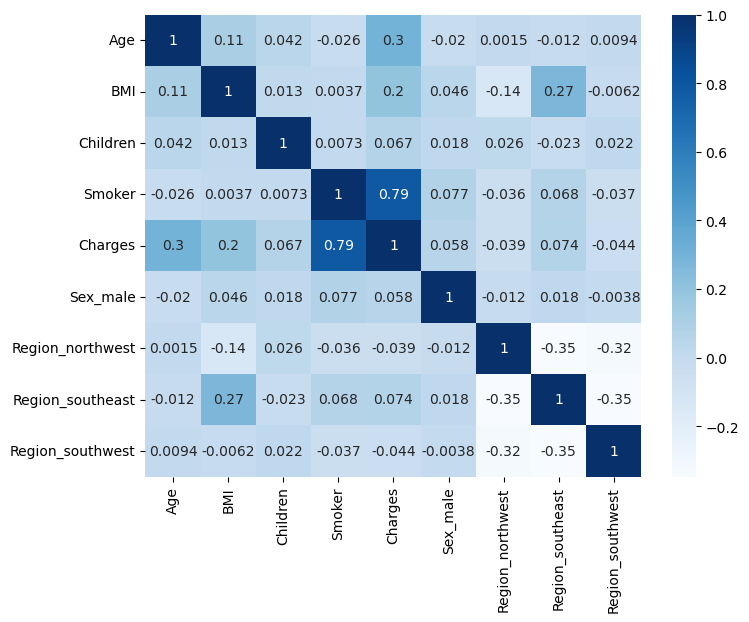

In [55]:
# Check Correlation with Heatmap:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True,cmap='Blues')
plt.show()

# Top five Feature Correlations with Target column(Charges):

    * Smoker	       0.79
    * Age	           0.30
    * BMI	           0.20
    * Region_southeast 0.074
    * Sex_male	       0.058

# MODEL BUILDING:

In [20]:
# Import required Libraries:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [21]:
# Encoded data is being loaded from csv file which was exported earlier after encoding:
data= pd.read_csv(r"Encoded_Data.csv")
data.head()

,Age,BMI,Children,Smoker,Charges,Sex_male,Region_northwest,Region_southeast,Region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


In [22]:
# Split Data into X and y:
X = data.drop('Charges', axis=1)
y = data['Charges']

In [23]:
# Split X, y data further into train and test data with perentages as train =80% and test =20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# X_train no of Rows and Columns:
X_train.shape

(1069, 8)

In [25]:
# y_train no of rows:
y_train.shape

(1069,)

In [26]:
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X.shape[1]}")

Test set size: 268 samples
Number of features: 8


# Build six models with the below algorithms:
    * LinearRegression
    * Support Vector Regression
    * Decision Tree Regressor
    * RandomForestRegressor
    * GradientBoostingRegressor
    * MLPRegressor

In [27]:
# Create a variable to store the Reulsts of Models to present a summary of all models towards the end:
model_results = []

In [28]:
# (1)Linear Regression:
print("LINEAR REGRESSION")
print("="*50)

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Training the Model:
pipe_lr.fit(X_train, y_train)

# Predictions
lr_train_pred = pipe_lr.predict(X_train)
lr_test_pred = pipe_lr.predict(X_test)

# Metrics
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)

# Cross-validation
lr_cv_scores = cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='r2')

print(f"\nPerformance Metrics:")
print(f"Training - R²: {lr_train_r2:.4f}")
print(f"Test     - R²: {lr_test_r2:.4f}, RMSE: ${lr_test_rmse:,.2f}, MAE: ${lr_test_mae:,.2f}")

print(f"\nCross Validation results")
print(f"5-Fold CV R² Scores: {[f'{score:.4f}' for score in lr_cv_scores]}")
print(f"Mean CV R² Score: {lr_cv_scores.mean():.4f}")

# Store results
model_results.append({
    'ModelName': 'Linear Regression',
    'Test_R2_Score': lr_test_r2,
    'Mean_CV_Score': lr_cv_scores.mean(),
    'Best_Params': 'Default'
})

print("="*50)

LINEAR REGRESSION

Performance Metrics:
Training - R²: 0.7299
Test     - R²: 0.8069, RMSE: $5,956.34, MAE: $4,177.05

Cross Validation results
5-Fold CV R² Scores: ['0.6941', '0.7636', '0.7211', '0.7058', '0.7442']
Mean CV R² Score: 0.7258


In [29]:
# (2)Support Vector Regression:
print("SUPPORT VECTOR REGRESSION")
print("="*50)

pipe_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR())
])

# Hyperparameter tuning for SVR
svr_param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'model__kernel': ['rbf', 'linear']
}

# Training the data with GridSearchCV:
svr_grid = GridSearchCV(pipe_svr, svr_param_grid, cv=5, scoring='r2', n_jobs= 1)
svr_grid.fit(X_train, y_train)

# Best pipeline
best_pipe_svr = svr_grid.best_estimator_

# Predictions
svr_train_pred = best_pipe_svr.predict(X_train)
svr_test_pred = best_pipe_svr.predict(X_test)

# Metrics
svr_train_r2 = r2_score(y_train, svr_train_pred)
svr_test_r2 = r2_score(y_test, svr_test_pred)
svr_test_rmse = np.sqrt(mean_squared_error(y_test, svr_test_pred))
svr_test_mae = mean_absolute_error(y_test, svr_test_pred)

# Cross-validation
svr_cv_scores = cross_val_score(best_pipe_svr, X_train, y_train, cv=5, scoring='r2')

print(f"\nPerformance Metrics:")
print(f"Training - R²: {svr_train_r2:.4f}")
print(f"Test     - R²: {svr_test_r2:.4f}, RMSE: ${svr_test_rmse:,.2f}, MAE: ${svr_test_mae:,.2f}")

print(f"\nCross-Validation Results:")
print(f"5-Fold CV R² Scores: {[f'{score:.4f}' for score in svr_cv_scores]}")
print(f"Mean CV R² Score: {svr_cv_scores.mean():.4f}")

print(f"\nHyperparameter Tuning Results:")
print(f"Best Parameters: {svr_grid.best_params_}")

# Store results
model_results.append({
    'ModelName': 'Support Vector Regression',
    'Test_R2_Score': svr_test_r2,
    'Mean_CV_Score': svr_cv_scores.mean(),
    'Best_Params': svr_grid.best_params_
})

print("="*50)

SUPPORT VECTOR REGRESSION

Performance Metrics:
Training - R²: 0.5921
Test     - R²: 0.6129, RMSE: $8,433.53, MAE: $4,187.92

Cross-Validation Results:
5-Fold CV R² Scores: ['0.5172', '0.6213', '0.6132', '0.5962', '0.6023']
Mean CV R² Score: 0.5900

Hyperparameter Tuning Results:
Best Parameters: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear'}


In [30]:
# (3)Decision Tree Regressor with Hyperparameter Tuning
print("DECISION TREE REGRESSOR")
print("="*50)

# Hyperparameter tuning for Decision Tree:
dt_param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Applying GridSearchCV:
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='r2', n_jobs=1)
dt_grid.fit(X_train, y_train)

# Best model
best_dt = dt_grid.best_estimator_

# Predictions
dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)

# Metrics
dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))
dt_test_mae = mean_absolute_error(y_test, dt_test_pred)

# Cross-validation

dt_cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='r2')


print(f"\nPerformance Metrics:")
print(f"Training - R²: {dt_train_r2:.4f}")
print(f"Test     - R²: {dt_test_r2:.4f}, RMSE: ${dt_test_rmse:,.2f}, MAE: ${dt_test_mae:,.2f}")

print(f"\nCross-Validation Results:")
print(f"5-Fold CV R² Scores: {[f'{score:.4f}' for score in dt_cv_scores]}")
print(f"Mean CV R² Score: {dt_cv_scores.mean():.4f}")

print(f"\nHyperparameter Tuning Results:")
print(f"Best Parameters: {dt_grid.best_params_}")

# Store results
model_results.append({
    'ModelName': 'Decision Tree Regressor',
    'Test_R2_Score': dt_test_r2,
    'Mean_CV_Score': dt_cv_scores.mean(),
    'Best_Params': dt_grid.best_params_
})

print("="*50)

DECISION TREE REGRESSOR

Performance Metrics:
Training - R²: 0.8035
Test     - R²: 0.7684, RMSE: $6,524.09, MAE: $3,834.24

Cross-Validation Results:
5-Fold CV R² Scores: ['0.7552', '0.7575', '0.7498', '0.7398', '0.8360']
Mean CV R² Score: 0.7677

Hyperparameter Tuning Results:
Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [31]:
# (4)Random Forest Regressor with Hyperparameter Tuning
print("RANDOM FOREST REGRESSOR")
print("="*50)

# Hyperparameter tuning for Random Forest:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Applying GridSearchCV:
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='r2', n_jobs= 1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_

# Predictions
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

# Metrics
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

# Cross-validation
rf_cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

print(f"\nPerformance Metrics:")
print(f"Training - R²: {rf_train_r2:.4f}")
print(f"Test     - R²: {rf_test_r2:.4f}, RMSE: ${rf_test_rmse:,.2f}, MAE: ${rf_test_mae:,.2f}")

print(f"\nCross-Validation Results:")
print(f"5-Fold CV R² Scores: {[f'{score:.4f}' for score in rf_cv_scores]}")
print(f"Mean CV R² Score: {rf_cv_scores.mean():.4f}")

print(f"\nHyperparameter Tuning Results:")
print(f"Best Parameters: {rf_grid.best_params_}")

# Store results
model_results.append({
    'ModelName': 'Random Forest Regressor',
    'Test_R2_Score': rf_test_r2,
    'Mean_CV_Score': rf_cv_scores.mean(),
    'Best_Params': rf_grid.best_params_
})
print("="*50)

RANDOM FOREST REGRESSOR

Performance Metrics:
Training - R²: 0.9309
Test     - R²: 0.8495, RMSE: $5,259.26, MAE: $3,402.40

Cross-Validation Results:
5-Fold CV R² Scores: ['0.7849', '0.8217', '0.8199', '0.8155', '0.8182']
Mean CV R² Score: 0.8121

Hyperparameter Tuning Results:
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [32]:
# (5)Gradient Boosting Regressor with Hyperparameter Tuning
print("\n" + "="*50)
print("GRADIENT BOOSTING REGRESSOR")
print("="*50)

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Applying GridSearchCV:
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train, y_train)

# Best model
best_gb = gb_grid.best_estimator_

# Predictions
gb_train_pred = best_gb.predict(X_train)
gb_test_pred = best_gb.predict(X_test)

# Metrics
gb_train_r2 = r2_score(y_train, gb_train_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_test_mae = mean_absolute_error(y_test, gb_test_pred)

# Cross-validation
gb_cv_scores = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='r2')


print(f"\nPerformance Metrics:")
print(f"Training - R²: {gb_train_r2:.4f}")
print(f"Test     - R²: {gb_test_r2:.4f}, RMSE: ${gb_test_rmse:,.2f}, MAE: ${gb_test_mae:,.2f}")

print(f"\nCross-Validation Results:")
print(f"5-Fold CV R² Scores: {[f'{score:.4f}' for score in gb_cv_scores]}")
print(f"Mean CV R² Score: {gb_cv_scores.mean():.4f}")

print(f"\nHyperparameter Tuning Results:")
print(f"Best Parameters: {gb_grid.best_params_}")

# Store results
model_results.append({
    'ModelName': 'Gradient Boosting Regressor',
    'Test_R2_Score': gb_test_r2,
    'Mean_CV_Score': gb_cv_scores.mean(),
    'Best_Params': gb_grid.best_params_
})
print("="*50)


GRADIENT BOOSTING REGRESSOR

Performance Metrics:
Training - R²: 0.8704
Test     - R²: 0.9015, RMSE: $4,253.94, MAE: $2,491.92

Cross-Validation Results:
5-Fold CV R² Scores: ['0.8079', '0.8652', '0.8402', '0.8563', '0.8535']
Mean CV R² Score: 0.8446

Hyperparameter Tuning Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [33]:
# (6)MLP Regressor with Hyperparameter Tuning
print("MLP REGRESSOR (NEURAL NETWORK)")
print("="*50)

pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPRegressor(random_state=42, max_iter=1000))
])


# Hyperparameter tuning for MLP
mlp_param_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__learning_rate': ['constant', 'adaptive']
}

# Grid Search
mlp_grid = GridSearchCV(pipe_mlp, mlp_param_grid, cv=5, scoring='r2', n_jobs= 1)
mlp_grid.fit(X_train, y_train)

# Best pipeline
best_pipe_mlp = mlp_grid.best_estimator_

# Predictions
mlp_train_pred = best_pipe_mlp.predict(X_train)
mlp_test_pred = best_pipe_mlp.predict(X_test)

# Metrics
mlp_train_r2 = r2_score(y_train, mlp_train_pred)
mlp_test_r2 = r2_score(y_test, mlp_test_pred)
mlp_test_rmse = np.sqrt(mean_squared_error(y_test, mlp_test_pred))
mlp_test_mae = mean_absolute_error(y_test, mlp_test_pred)

# Cross-validation

mlp_cv_scores = cross_val_score(best_pipe_mlp, X_train, y_train, cv=5, scoring='r2')


print(f"\nPerformance Metrics:")
print(f"Training - R²: {mlp_train_r2:.4f}")
print(f"Test     - R²: {mlp_test_r2:.4f}, RMSE: ${mlp_test_rmse:,.2f}, MAE: ${mlp_test_mae:,.2f}")

print(f"\nCross-Validation Results:")
print(f"5-Fold CV R² Scores: {[f'{score:.4f}' for score in mlp_cv_scores]}")
print(f"Mean CV R² Score: {mlp_cv_scores.mean():.4f}")

print(f"\nHyperparameter Tuning Results:")
print(f"Best Parameters: {mlp_grid.best_params_}")

# Store results
model_results.append({
    'ModelName': 'MLP Regressor',
    'Test_R2_Score': mlp_test_r2,
    'Mean_CV_Score': mlp_cv_scores.mean(),
    'Best_Params': mlp_grid.best_params_
})

print("="*50)

MLP REGRESSOR (NEURAL NETWORK)

Performance Metrics:
Training - R²: 0.8134
Test     - R²: 0.8661, RMSE: $4,959.80, MAE: $3,111.49

Cross-Validation Results:
5-Fold CV R² Scores: ['0.7450', '0.8030', '0.7830', '0.7534', '0.8092']
Mean CV R² Score: 0.7787

Hyperparameter Tuning Results:
Best Parameters: {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100, 50), 'model__learning_rate': 'constant'}


In [34]:
# (7)Summary Report of all Modles in ascending order:
print("MODEL PERFORMANCE SUMMARY REPORT")
print("="*70)

# Create DataFrame for results
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Mean_CV_Score', ascending=False)

display(results_df[['ModelName', 'Test_R2_Score', 'Mean_CV_Score']].round(4))

MODEL PERFORMANCE SUMMARY REPORT


,ModelName,Test_R2_Score,Mean_CV_Score
4,Gradient Boosting Regressor,0.9015,0.8446
3,Random Forest Regressor,0.8495,0.8121
5,MLP Regressor,0.8661,0.7787
2,Decision Tree Regressor,0.7684,0.7677
0,Linear Regression,0.8069,0.7258
1,Support Vector Regression,0.6129,0.5900


In [35]:
# Best Model Selection:
print("\n" + "="*70)
print("BEST MODEL SELECTION")
print("="*70)

best_model_info = results_df.iloc[0]
print(f"Best Model: {best_model_info['ModelName']}")
print(f"Test R² Score: {best_model_info['Test_R2_Score']:.4f}")
print(f"Mean CV R² Score: {best_model_info['Mean_CV_Score']:.4f}")
print(f"Best Parameters: {best_model_info['Best_Params']}")

# Map model names to actual model objects
model_mapping = {
    'Linear Regression': pipe_lr,
    'Support Vector Regression': best_pipe_svr,
    'Decision Tree Regressor': best_dt,
    'Random Forest Regressor': best_rf,
    'Gradient Boosting Regressor': best_gb,
    'MLP Regressor': best_pipe_mlp
}

# Get the best model object
best_model_name = best_model_info['ModelName']
final_best_model = model_mapping[best_model_name]


BEST MODEL SELECTION
Best Model: Gradient Boosting Regressor
Test R² Score: 0.9015
Mean CV R² Score: 0.8446
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [36]:
# Testing the best model with 20 samples from X_test data:
import numpy as np
import pandas as pd

# Generate predictions using your best model
final_test_pred = final_best_model.predict(X_test)  # Use final_best_model

# Show 20 randomly selected comparisons
print("20 Randomly Selected Predictions:")
print("="*50)

# Get 20 random indices
random_indices = np.random.choice(len(y_test), 20, replace=False)

for i, idx in enumerate(random_indices, 1):
    actual = y_test.iloc[idx]
    predicted = final_test_pred[idx]
    difference = abs(actual - predicted)
    print(f"{i:2d}. Actual: ${actual:8,.2f}, Predicted: ${predicted:8,.2f}, Diff: ${difference:6,.2f}")

print("="*50)

20 Randomly Selected Predictions:
 1. Actual: $1,632.04, Predicted: $3,536.56, Diff: $1,904.53
 2. Actual: $5,979.73, Predicted: $6,561.48, Diff: $581.75
 3. Actual: $3,925.76, Predicted: $6,150.13, Diff: $2,224.37
 4. Actual: $5,245.23, Predicted: $6,455.09, Diff: $1,209.87
 5. Actual: $11,085.59, Predicted: $12,157.15, Diff: $1,071.56
 6. Actual: $4,564.19, Predicted: $7,134.67, Diff: $2,570.48
 7. Actual: $1,728.90, Predicted: $3,652.48, Diff: $1,923.58
 8. Actual: $8,835.26, Predicted: $10,712.63, Diff: $1,877.36
 9. Actual: $20,781.49, Predicted: $12,281.17, Diff: $8,500.31
10. Actual: $41,949.24, Predicted: $42,855.42, Diff: $906.17
11. Actual: $13,887.20, Predicted: $14,310.85, Diff: $423.65
12. Actual: $6,948.70, Predicted: $9,620.11, Diff: $2,671.41
13. Actual: $12,981.35, Predicted: $14,031.78, Diff: $1,050.44
14. Actual: $7,201.70, Predicted: $8,348.63, Diff: $1,146.93
15. Actual: $2,855.44, Predicted: $4,766.14, Diff: $1,910.70
16. Actual: $2,203.47, Predicted: $3,894.63, D

* Objective is achieved through building a succesful model to predict charges.
* Gradient Boosting Regressor has been selected as best model with Test R² Score: 0.9015 and Mean CV R² Score: 0.8446.
* A comparison of actual charges and predicted charges with difference between them are shown.
* There is scope of improving the scores with further tuning.
* And predictions can be improved with more data from client as this dataset is small.
* Some of the differences (actual - predicted) which are large should be analyzed further so that predictions are more accurate with good reasoning. 


In [ ]:
----End of Notebook-------